In [112]:
from rembg import remove
from PIL import Image 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [151]:
def remove_bg(img_path, out_path):
    input_img = Image.open(img_path)
    output_img = remove(input_img)
    output_img.save(out_path)

In [149]:
index = ["color", "color_name", "hex", "R", "G", "B"]
csv = pd.read_csv('colors.csv', names=index, header=None)

def get_color_name(r, g, b):
    
    R = r * 255
    G = g * 255
    B = b * 255
    minimum = 10000
    
    for i in range(len(csv)):
        d = (
            abs(R- int(csv.loc[i,"R"])) + 
            abs(G- int(csv.loc[i,"G"])) + 
            abs(B- int(csv.loc[i,"B"]))
        )
        
        if(d<=minimum):
            minimum = d
            cname = csv.loc[i,"color_name"]

    return cname

def get_color_names(colors):
    return set([get_color_name(c[0], c[1], c[2]) for c in colors])

In [132]:
def get_top_colors(img_path, n=3):
    image = plt.imread(img_path)
    
    n_clusters = 9
    rows, cols, channels = image.shape  # get the image shape
    X = image.reshape(rows * cols, channels)
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    labels = kmeans.labels_.reshape(rows, cols)
    centers = kmeans.cluster_centers_.clip(0, 1)
    
    unique_labels, counts = np.unique(labels, return_counts=True)
    res = tuple(zip(centers[unique_labels], counts))
    
    colors = []
    counts = []
    for r in res:
        if r[0][3] < 0.2:
            # background no alpha
            continue
        colors.append(r[0])
        counts.append(r[1])
    
    color_order = np.argsort(counts)[::-1]
    colors = np.array(colors)[color_order][:n]
    counts = np.array(counts)[color_order][:n]
    return colors, counts

In [146]:
def plot_top_colors(img_path, top_colors, counts):
    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12, 9))

    ax1.imshow(plt.imread(img_path))
    ax1.axis('off')

    ax2.pie(counts, colors=top_colors)

In [156]:
img_path = 'test_images/grey_shirt_with_light_pink_sea_shell.png'
out_path = "test_images_nobg/i0001.png"

remove_bg(img_path, out_path)

In [157]:
img_path = "test_images_nobg/i0001.png"
top_colors, counts = get_top_colors(out_path)

c:\users\aphri\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


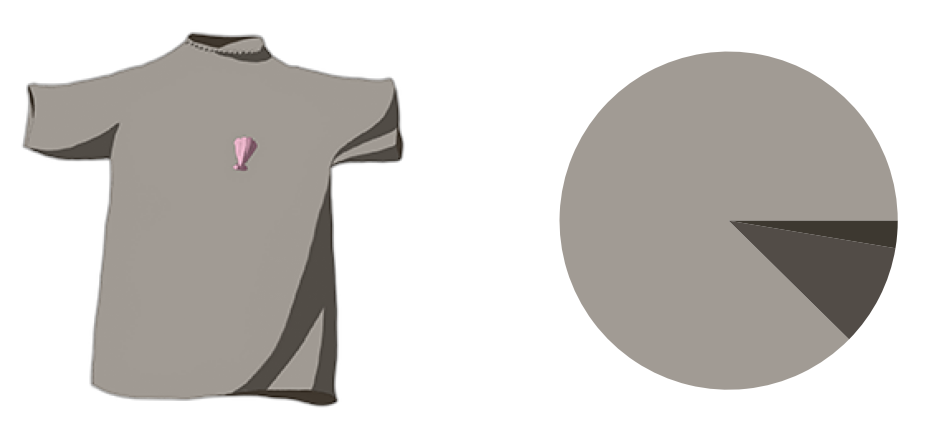

In [158]:
plot_top_colors(out_path, top_colors, counts)

In [159]:
res = get_color_names(top_colors)
print(res)

{'Quartz', 'Olive Drab #7', 'Grullo'}
